Data source: [National Center for Environmental Information](https://www.ncei.noaa.gov/access/past-weather/san%20francisco)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/data.csv")

In [3]:
df.head()

,date,average,max,min,prcp,snow,snwd
0,1921-01-01,NaN,60.0,45.0,0.00,0.0,NaN
1,1921-01-02,NaN,54.0,46.0,0.00,0.0,NaN
2,1921-01-03,NaN,60.0,50.0,0.00,0.0,NaN
3,1921-01-04,NaN,61.0,47.0,0.00,0.0,NaN
4,1921-01-05,NaN,54.0,47.0,0.38,0.0,NaN


In [4]:
df.tail()

,date,average,max,min,prcp,snow,snwd
36213,2020-02-25,NaN,74.0,51.0,0.0,0.0,0.0
36214,2020-02-26,NaN,73.0,53.0,0.0,0.0,0.0
36215,2020-02-27,NaN,75.0,53.0,0.0,0.0,0.0
36216,2020-02-28,NaN,66.0,50.0,0.0,0.0,0.0
36217,2020-02-29,NaN,54.0,49.0,0.0,0.0,0.0


In [5]:
df = df.drop(columns=['average', 'prcp', 'snow', 'snwd'])

2022 updated data from [National Weather Service](https://www.weather.gov/wrh/climate?wfo=mtr)

In [6]:
new_data_2022 = {'date':['2022-09-01', '2022-09-02','2022-09-03', '2022-09-04', '2022-09-05','2022-09-06','2022-09-07','2022-09-08','2022-09-09','2022-09-10','2022-09-11'],
        'max':[66,68,75,82,91,98,81,87,71,68,69],
        'min':[54,54,57,57,61,64,62,62,57,59,61]
       }
df2022 = pd.DataFrame(new_data_2022)

2020 and 2021 data from [NOAA Station Data](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00023272/detail)

In [7]:
new_data_2021 = {'date':['2021-09-01', '2021-09-02','2021-09-03', '2021-09-04', '2021-09-05','2021-09-06','2021-09-07','2021-09-08','2021-09-09','2021-09-10','2021-09-11'],
        'max':[64,66,61,66,68,77,66,70,64,63,66],
        'min':[56,56,54,53,52,54,57,59,57,57,57]
       }
df2021 = pd.DataFrame(new_data_2021)

In [8]:
new_data_2020 = {'date':['2020-09-01', '2020-09-02','2020-09-03', '2020-09-04', '2020-09-05','2020-09-06','2020-09-07','2020-09-08','2020-09-09','2020-09-10','2020-09-11'],
        'max':[65,66,64,69,89,100,91,71,60,64,71],
        'min':[56,58,56,55,58,71,62,57,57,57,54]
       }
df2020 = pd.DataFrame(new_data_2020)

In [9]:
df_update = pd.concat([df,df2020,df2021,df2022],ignore_index=True)
df_update['gap'] = df_update['max'] - df_update['min']

In [10]:
df_update['date'] = pd.to_datetime(df_update.date, format='%Y-%m-%d', errors='coerce')

In [11]:
df_update.set_index('date', inplace=True)

In [12]:
df_update.head()

,max,min,gap
date,,,
1921-01-01,60.0,45.0,15.0
1921-01-02,54.0,46.0,8.0
1921-01-03,60.0,50.0,10.0
1921-01-04,61.0,47.0,14.0
1921-01-05,54.0,47.0,7.0


## filter out all the 0901-0911 data

In [13]:
df_sept = df_update[df_update.index.month.isin([9])&df_update.index.day.isin([1,2,3,4,5,6,7,8,9,10,11])].sort_index(ascending=True).reset_index()

In [14]:
df_sept.head()

,date,max,min,gap
0,1921-09-01,67.0,55.0,12.0
1,1921-09-02,66.0,56.0,10.0
2,1921-09-03,73.0,55.0,18.0
3,1921-09-04,80.0,56.0,24.0
4,1921-09-05,78.0,53.0,25.0


In [15]:
df_sept['category'] = 'before'
df_sept.loc[df_sept['date'].dt.year > 1980, 'category'] = 'after'

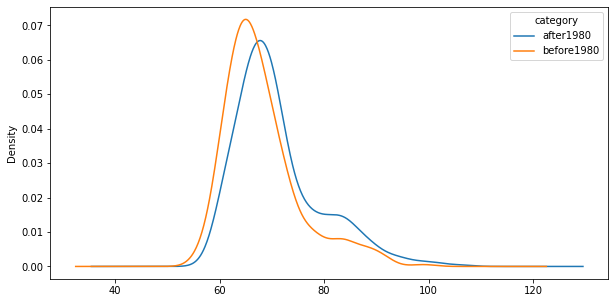

In [16]:
import matplotlib.pyplot as plt
df_sept.groupby('category')['max'].plot(kind='kde',figsize=(10,5))
plt.legend(['after1980', 'before1980'], title='category')

In [17]:
df_sept.groupby(['category']).describe()

max                                                        min  \
          count       mean       std   min   25%   50%   75%    max  count   
category                                                                     
after     462.0  71.106061  8.263004  59.0  66.0  69.0  74.0  106.0  462.0   
before    660.0  68.095455  7.291147  55.0  63.0  66.5  71.0  100.0  660.0   

                     ...                gap                                  \
               mean  ...   75%   max  count       mean       std  min   25%   
category             ...                                                      
after     56.209957  ...  58.0  75.0  462.0  14.896104  7.105803  3.0  10.0   
before    55.300000  ...  57.0  70.0  660.0  12.795455  6.149551  2.0   9.0   

                            
           50%   75%   max  
category                    
after     13.0  18.0  37.0  
before    11.0  15.0  40.0  

[2 rows x 24 columns]

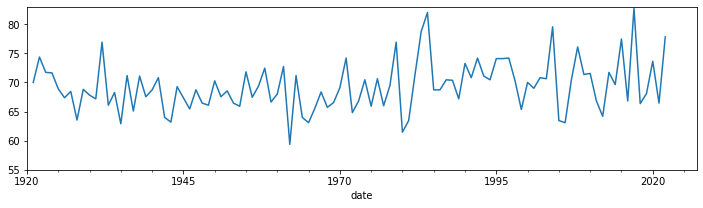

In [18]:
fig1 = df_sept.resample('Y', on='date')['max'].mean().plot(figsize=(12,3),ylim=(55,83),xlim=('1920','2027')).figure
fig1.savefig('fig1.pdf')

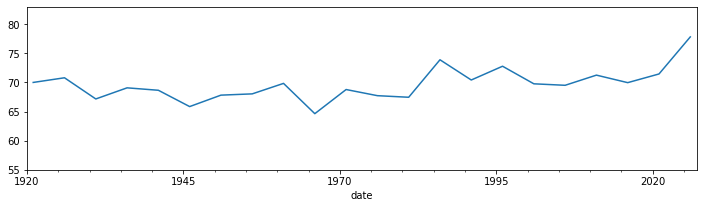

In [19]:
fig_rs = df_sept.resample('5Y', on='date')['max'].mean().plot(figsize=(12,3),ylim=(55,83),xlim=('1920','2027')).figure
fig_rs.savefig('fig_rs.pdf')

In [ ]:
#fig2 = df_sept.resample('Y', on='date')['min'].mean().plot(figsize=(12,3)).figure
#fig2.savefig('fig2.pdf')

In [ ]:
#df_sept.resample('Y', on='date')['gap'].mean().plot(figsize=(12,3))

<AxesSubplot:xlabel='date'>

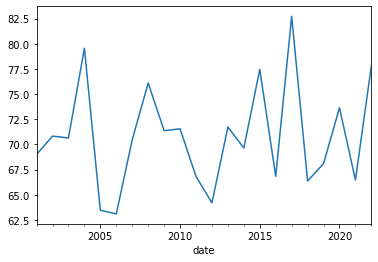

In [20]:
df_sept[df_sept.date.dt.year > 2000].resample('Y', on='date')['max'].mean().plot()

<AxesSubplot:xlabel='date'>

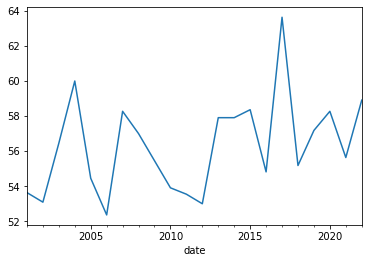

In [21]:
df_sept[df_sept.date.dt.year > 2000].resample('Y', on='date')['min'].mean().plot()

<AxesSubplot:xlabel='date'>

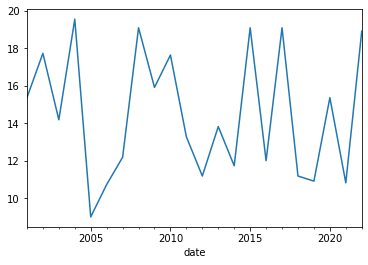

In [22]:
df_sept[df_sept.date.dt.year > 2000].resample('Y', on='date')['gap'].mean().plot()

## Group by year

In [23]:
df_sept.set_index('date', inplace=True)

In [24]:
rank = df_sept.groupby(by=[df_sept.index.year]).mean().reset_index()

In [25]:
rank.sort_values(by='max',ascending=False).head(10)

,date,max,min,gap
96,2017,82.727273,63.636364,19.090909
63,1984,82.000000,57.727273,24.272727
83,2004,79.545455,60.000000,19.545455
62,1983,78.727273,57.636364,21.090909
101,2022,77.818182,58.909091,18.909091
94,2015,77.454545,58.363636,19.090909
58,1979,76.909091,61.363636,15.545455
11,1932,76.909091,55.727273,21.181818
87,2008,76.090909,57.000000,19.090909
1,1922,74.363636,56.454545,17.909091


In [26]:
rank.sort_values(by='min',ascending=False).head(10)

,date,max,min,gap
96,2017,82.727273,63.636364,19.090909
58,1979,76.909091,61.363636,15.545455
83,2004,79.545455,60.000000,19.545455
76,1997,74.181818,59.727273,14.454545
101,2022,77.818182,58.909091,18.909091
37,1958,72.454545,58.909091,13.545455
47,1968,65.727273,58.818182,6.909091
64,1985,68.727273,58.636364,10.090909
20,1941,70.818182,58.545455,12.272727
94,2015,77.454545,58.363636,19.090909


In [27]:
rank.sort_values(by='gap',ascending=False).head(10)

,date,max,min,gap
63,1984,82.000000,57.727273,24.272727
11,1932,76.909091,55.727273,21.181818
62,1983,78.727273,57.636364,21.090909
83,2004,79.545455,60.000000,19.545455
96,2017,82.727273,63.636364,19.090909
94,2015,77.454545,58.363636,19.090909
87,2008,76.090909,57.000000,19.090909
101,2022,77.818182,58.909091,18.909091
34,1955,71.818182,53.181818,18.636364
75,1996,74.090909,55.454545,18.636364


## Look at the day

In [28]:
df_sept.sort_values(by='max',ascending=False).head(10)

,max,min,gap,category
date,,,,
2017-09-01,106.0,69.0,37.0,after
2017-09-02,102.0,75.0,27.0,after
2020-09-06,100.0,71.0,29.0,after
1984-09-08,100.0,64.0,36.0,after
1932-09-09,100.0,60.0,40.0,before
1979-09-11,98.0,67.0,31.0,before
2022-09-06,98.0,64.0,34.0,after
2004-09-05,96.0,62.0,34.0,after
2015-09-08,95.0,65.0,30.0,after


## Mission specific

The mission data is from [weather underground](https://www.wunderground.com/dashboard/pws/KCASANFR1141/table/2017-09-17/2017-09-17/monthly). I abandoned this part of data because one source mentioned the data quality might be 
suspicious. The downtown station is under regular checks but not those ones on the weather underground.

In [45]:
df = pd.read_csv("data/mission-temp.csv")
df = df[['date','high','avg','low']]

In [46]:
df.head()

,date,high,avg,low
0,9/1/2022,80.4 °F,65.8 °F,52.0 °F
1,9/2/2022,85.8 °F,64.6 °F,48.4 °F
2,9/3/2022,88.9 °F,70.5 °F,52.3 °F
3,9/4/2022,91.4 °F,76.6 °F,56.1 °F
4,9/5/2022,98.1 °F,70.4 °F,62.8 °F


In [47]:
df.high = df.high.str.replace('°F','').astype(float)
df.avg = df.avg.str.replace('°F','').astype(float)
df.low = df.low.str.replace('°F','').astype(float)
df['date'] = pd.to_datetime(df.date, format='%m/%d/%Y', errors='coerce')

In [48]:
df.head()

,date,high,avg,low
0,2022-09-01,80.4,65.8,52.0
1,2022-09-02,85.8,64.6,48.4
2,2022-09-03,88.9,70.5,52.3
3,2022-09-04,91.4,76.6,56.1
4,2022-09-05,98.1,70.4,62.8


In [49]:
df.to_csv('clean_mission_data.csv',index=False)

In [ ]:
df_avg = df[['date','avg']]
df_avg['year'] = df_avg.date.dt.year
df_avg['day'] = df_avg.date.dt.day
mission_avg = pd.pivot(df_avg, index='day', columns='year', values='avg').reset_index()
mission_avg.to_csv('clean_mission_avg.csv',index=False)

## Last week data

In [50]:
df2022

,date,max,min
0,2022-09-01,66,54
1,2022-09-02,68,54
2,2022-09-03,75,57
3,2022-09-04,82,57
4,2022-09-05,91,61
5,2022-09-06,98,64
6,2022-09-07,81,62
7,2022-09-08,87,62
8,2022-09-09,71,57
9,2022-09-10,68,59


In [51]:
df2022.to_csv('clean_sf_temp.csv',index=False)

## Temp all year round

Data generated by [SC ACIS](https://scacis.rcc-acis.org/).

In [61]:
df = pd.read_csv("data/year-month-sf-temp.csv")

In [62]:
df["year"] = pd.to_numeric(df["year"])

In [64]:
df['category'] = 'after'
df.loc[df['year'] < 1980, 'category'] = 'before'

In [65]:
df.head()

,year,jan,feb,march,april,may,june,july,aug,sept,oct,nov,dec,category
0,1921,61,69,73,86,71,90,94,77,93,85,79,66,before
1,1922,61,63,69,75,87,84,74,81,91,81,65,61,before
2,1923,58,73,84,79,81,69,82,83,87,86,78,65,before
3,1924,65,73,72,86,88,87,70,71,88,83,73,62,before
4,1925,66,72,79,77,83,95,79,84,81,85,66,70,before


In [66]:
df.groupby(by='category').mean()

,year,jan,feb,march,april,may,june,july,aug,sept,oct,nov,dec
category,,,,,,,,,,,,,
after,2000.5,67.428571,72.476190,75.857143,81.833333,81.809524,85.214286,81.428571,83.690476,89.738095,88.190476,75.714286,66.690476
before,1950.0,64.898305,69.084746,74.525424,76.898305,80.949153,82.084746,78.101695,79.491525,88.525424,84.796610,75.237288,66.135593


In [67]:
df = pd.melt(df, id_vars=['year'], value_vars=['jan','feb','march','april','may','june','july','aug','sept','oct','nov','dec'], var_name='month')

In [68]:
df.head()

,year,month,value
0,1921,jan,61
1,1922,jan,61
2,1923,jan,58
3,1924,jan,65
4,1925,jan,66
